# Mini-project IIb: How many lines are there?  

The overall project goal is to determine how many signal peaks there are in a noisy set of data.

### Learning goals:
* Use advanced Monte Carlo sampling to generate posterior probability distributions and analyze the results.
* Compute an evidence ratio and explain what it means.
* Employ Bayesian evidence for model selection in the context of a prototype for an experimental spectral measurement.

# A spectral line problem

See e.g. section 4.2 in Sivia (see Carmen) for a similar problem formulation. In short, we have data from a spectroscopy experiment that supposedly shows a number of spectral lines. The ideal spectrum, as a function of a scaled coordinate $x$, can be expressed as

$$ G(x) = \sum_{j=1}^M A_j f(x,x_j),$$

where $A_j$ is the amplitude of the $j$th line, and $x_j$ represents its position. If all the spectral lines were Gaussians of width $W$, for example, then

$$ f(x,x_j) = \frac{1}{\sqrt{2\pi W^2}} \exp \left[ - \frac{(x-x_j)^2}{2 W^2} \right]$$

The measurement also includes a background signal which we take to be constant $B(x) = B$. 
 
We use the label '$k$' to enumerate the bins $\{x_k\}$ (do not confuse $x_k$ and $x_j$). The spectrum according to our model is therefore
 
 $$ F_k \equiv F(x_k) = G(x_k) + B.$$

The experimental data is denoted $\{ D_k\}$. This data also includes measurement errors $\varepsilon$ that are assumed to be independent and identically distributed (IID) normal with the same variance $\sigma_\mathrm{exp}$. The measured data is then related to the ideal spectrum by

$$ D_k \equiv D(x_k) = G(x_k) + B + \varepsilon.$$

The task is to infer how many spectral lines ($M$) are in the experimental data, and their positions ($x_j$) and amplitudes ($A_j$). The magnitude of the background is not known before the analysis except that it must be $ \leq 1$.

Using scaled parameters the range of peak positions is $[0,1]$, and the range of amplitudes as well as background is also $[0,1]$.

### Solution strategy:
Our model with $M$ lines has $2M+1$ model parameters that we denote by the vector $\vec{\alpha}$. These are the amplitudes, the positions, and the constant background. We order them as follows:

$$ \vec{\alpha} = (A_0, x_0, A_1, x_1, \ldots, B).$$

The background strength is a *nuisance parameter* in the sense that we're not really interested in its value, we just need to marginalize over it.

### Subtasks (put your answers here):
**For the first two, see Sivia 4.2 if you get stuck.**
1. Formulate the problem of how many lines and what are the model parameters in Bayesian language.
<br><br>
One possible way is to view the problem as a model selection problem, such that each possible model is characterized uniquely by the number of spectral lines, $M$. As mentioned previously, each line is located at $x_j$ and $A_j$, which comprise the $2M+1$ model parameters together with the background $B$. To make the formalism more specific, the evidence for a model with $M$ lines is
<br><br>
$$p(M | \{ D_k \}, I) \propto M!\cdot p(\{D_k\} | M,I) p(M|I)$$
<br>
where $M!$ accounts for the number of possible ways to label $M$ spectral lines, i.e. to assign each line the associated integer label $j$. In practice, without any prior knowledge besides perhaps a realistic maximum number of lines, we can give $p(M|I)$ an equal weight for each $1\leq M\leq M_{\max}$ for some $M_{\max}>1$. The other factor in the evidence expression is
<br><br>
$$p(\{D_k\} | M,I) = \int d^MA_j\;d^Mx_j\;p(\{D_k\}, \{A_j,x_j\} | M,I) = \int d^MA_j\;d^Mx_j\;p(\{D_k\} | \{A_j,x_j\} ,M,I)p(\{A_j,x_j\} | M,I)$$
<br>
Given that $D_k = F_k+\varepsilon = B+ \sum_{j=1}^MA_jf(x_k,x_j)+\varepsilon$ where $\varepsilon\sim\mathcal{N}(0,\sigma^2_{\text{exp}})$, the likelihood is of the form
<br><br>
$$p(\{D_k\} | \{A_j,x_j\} ,M,I) \propto \exp\left[-\frac{1}{2\sigma^2_{\text{exp}}}\left(D_k-F_k\right)^2\right] \equiv \exp\left[-\frac{\chi^2}{2}\right]$$
<br>
The prior, $p(\{A_j,x_j\} | M,I)$, also plays a role on the evidence calculation. Generally, it depends on the knowledge we have of the spectral lines.
<br><br>
1. Using the expressions from step 1, derive the approximate posterior probability:
$$
p(M | \{ D_k \}, I ) \propto 
\frac{M! (4 \pi)^M }{\left[ x_\mathrm{max} - x_\mathrm{min} \right]^M \left[ A_\mathrm{max} - A_\mathrm{min} \right]^M \sqrt{\det(\boldsymbol\nabla \boldsymbol\nabla \chi^2)} } 
\exp \left( - \frac{\chi^2_\mathrm{min}}{2} \right).
$$
<br>
If we take the prior, $p(\{A_j,x_j\} | M,I)$, to be independent uniform distributions, such that $x_{\min}\leq x_j\leq x_{\max}$ and $A_{\min}\leq A_j\leq A_{\max}$ for all $j$, then we can write
<br><br>
$$p(\{A_j,x_j\} | M,I) = \frac{1}{\left[ x_\mathrm{max} - x_\mathrm{min} \right]^M \left[ A_\mathrm{max} - A_\mathrm{min} \right]^M}$$
<br>
Now, relying on the fact that the likelihood, $p(\{D_k\} | \{A_j,x_j\} ,M,I) \propto \exp\left[-\frac{\chi^2}{2}\right]$, shrinks by a lot when $\chi^2$ is more than a small difference away from its minimum value, $\chi^2_{\min}$, we approximate $\chi^2$ by the power series about its minimum up to the quadratic order, that is,
<br><br>
$$\chi^2 = \chi^2_{\min} + \frac{1}{2}\sum_{i=1}^{2M}\sum_{i'=1}^{2M}(Y^i - Y^i_0)(Y^{i'} - Y^{i'}_0)\left[\frac{\partial^2}{\partial Y^i\partial Y^{i'}}\chi^2\right]\bigg|_{Y = Y_0}$$
<br>
where $Y = (x_1,x_2,\ldots,x_M,A_1,A_2,\ldots,A_M)$ and $Y_0$ is the values of $Y$ that minimizes $\chi^2$. Writing the above expression in the vector form with $\left(\boldsymbol\nabla \boldsymbol\nabla\chi^2\right)_{ii'} \equiv \left[\frac{\partial^2}{\partial Y^i\partial Y^{i'}}\chi^2\right]\Big|_{Y = Y_0}$, we have that
<br><br>
$$\chi^2 = \chi^2_{\min} + \frac{1}{2}(Y - Y_0)^T\left[\boldsymbol\nabla \boldsymbol\nabla\chi^2\right](Y - Y_0)$$
<br>
Plugging everything into the evidence expression with $p(M|I)$ independent of $M$, as discussed in the previous question, we have that
<br><br>
$$p(M | \{ D_k \}, I ) \propto \frac{M!}{\left[ x_\mathrm{max} - x_\mathrm{min} \right]^M \left[ A_\mathrm{max} - A_\mathrm{min} \right]^M}\exp\left(-\frac{\chi^2_{\min}}{2}\right) \int d^{2M}Y\;\exp\left[-\frac{1}{4}(Y - Y_0)^T\left[\boldsymbol\nabla \boldsymbol\nabla\chi^2\right](Y - Y_0)\right]$$
<br>
Evaluating the integral, we get
<br><br>
$$p(M | \{ D_k \}, I ) \propto \frac{M!\left(4\pi\right)^M}{\left[ x_\mathrm{max} - x_\mathrm{min} \right]^M \left[ A_\mathrm{max} - A_\mathrm{min} \right]^M \sqrt{\det\left(\boldsymbol\nabla \boldsymbol\nabla\chi^2\right)}}\exp\left(-\frac{\chi^2_{\min}}{2}\right)$$
<br>
as desired.
<br><br>
1. **Bonus:** Explain how you might compute this probability numerically using Python. For this imagined numerical implementation you should consider that some model parameters enter non-linearly in your likelihood. (Note: you do not need to implement this calculation.)
<br><br>
I would look into MCMC-type simulation, most likely with parallel tampering, since it is not clear whether the distribution only has one mode.
<br><br>
1. Generate data using the code snippet below, but plan to change values to explore the dependence of the analysis on the number and relative position of peaks, noise, background, etc. Note that the random seed is initialized to specific values in this notebook. You should start with this example, but should then run the data generator several times to observe the degree of fluctuation.
<br><br>
See the code blocks below under "Generate data."
<br><br>
1. First let's see what happens with ordinary sampling to perform parameter estimation. Run the code below that uses emcee (our favorite MCMC sampler) for first one and then two signal peaks (`numpeaks = 1` then `2`). Comment on the posterior pdf (note that this is the full posterior now, not an approximation) in the two cases for the first corner plot and then the second. What is the difference between these plots? (Hint: what is the reason the first plot is multimodal when the model has two peaks?)
<br><br>
See the code blocks below under "emcee" and the explanations around them.
<br><br>
1. Run the parallel tempering code to compute the log evidence for a model with $M$ peaks, looking at $M$ from 1 to 4.  Fill in your results in the table here.  What are your conclusions about the number of peaks based on the evidence?  Does the evidence have a clear maximum or does it saturate?  Connect this result to the in-class discussion.
<br><br>
See the code blocks below under "Using parallel tempering: ptemcee" and the explanations around them to see how the table below was filled.

| numpeaks | log evidence |
|:--------:| :------: |
| 1        |   -196.7067 |
| 2        |   -52.9773 |
| 3        |   -53.0404 |
| 4        |   -53.7186 |


We see that the log evidence increases sharply from $M=1$ to $M=2$, but for models with $M>2$ the log evidence slowly decreases. This result still dictates that $M=2$ is the best model because its evidence is maximum. However, there is a saturation for evidences of models with $M>2$, that is, the maximum at $M=2$ is not extremely clear. In particular, the log evidence for $M=3$ model is only slightly lower than that of the $M=2$ model. 
<br><br>
If we take the perspective that we know the underlying model, that the spectrum pattern in fact has two lines, then the models with $M>2$ are too complicated for the task, i.e. they likely overfit. In term of the evidence, a model with $M>2$ may fit the data slightly better than the $M=2$ model, but it will also shrinks the posterior space even more, resulting in the Ockham Factor that overcomes the marginal improvement in the fit. In contrast, the $M=2$ model fits the data much better than $M=1$ model, resulting in a much higher log evidence despite the relatively mild opposite effect from the Ockham Factor.

7. **For a plus:** Repeat the parallel tempering calculation and discussion but for data with three peaks and smaller width and noise.
<br><br>

| numpeaks | log evidence |
|:--------:| :------: |
| 1        |   &nbsp; |
| 2        |   &nbsp; |
| 3        |   &nbsp; |
| 4        |   &nbsp; |



## Import statements

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats, scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # set default plot styles

import emcee
import ptemcee
import corner
print(f'Running on emcee v{emcee.__version__} and ptemcee v{ptemcee.__version__}')

Running on emcee v3.1.1 and ptemcee v1.0.0


## Generate data

### Parameters known before the analysis (explore different values for these as requested)

In [2]:
# Width W and noise sigma_exp
W = 0.12  # to try: switch to 0.10 # The width of the spectral lines
sigma_exp = 0.4  # to try: switch to 0.2 # Variance of IID experimental errors 

In [3]:
# Fixed prior ranges (Don't change these)
xmin=0; xmax=1;
Amin=0; Amax=1;
Bmax=1.;

### Parameters that should be learned from the data

In [4]:
np.random.seed() # Keep a definite number to reproduce the same data

# Number of lines
M = 2 

# Amplitudes of the spectral lines
A0 = 10**np.random.uniform(low=-.5, high=0, size=M) 

# Positions of the spectral lines
X0 = np.ones(M)*np.random.uniform(low=.1, high=.4, size=1) 

# Special treatment to place the lines close together
for i in np.arange(1,M):
    X0[i] += np.random.normal(loc=.3,scale=.1)
    X0[i] = min(0.95,X0[i])
    X0[i] = max(0.05,X0[i])

B = np.random.uniform(0.05, 0.8) # A constant background signal

print("True values:   Peak amplitude     Peak position")
print("-----------    --------------     -------------")
for iM in range(M):
    print(f"     peak #{iM}             {A0[iM]:.2f}              {X0[iM]:.2f}  ")
print(f" Background:             {B:.2f}")

True values:   Peak amplitude     Peak position
-----------    --------------     -------------
     peak #0             0.60              0.19  
     peak #1             0.71              0.59  
 Background:             0.72


In [5]:
# Define a truths array that will be of length 2*M + 1
truths = np.empty((2*X0.size + 1,), dtype=X0.dtype)
truths[-1] = B
truths[0:-1:2] = A0
truths[1:-1:2] = X0

# Define a labels list with parameter names
labels = []
for iM in range(M):
    labels.append(f"$A_{iM}$")
    labels.append(f"$X_{iM}$")
labels.append(f"$B$")

In [6]:
def f(x,x0,w):
    '''Simple Gaussian line shape. Position x0, width w.'''
    return np.exp(- (x-x0)**2 / (2 * w**2)) / np.sqrt(2*np.pi*w**2)

def G(x,amplitudes,positions,width=W):
    '''Ideal spectrum composed of N spectral lines with input amplitudes 
    and positions (arrays of length N), and a single, fixed width.'''
    ideal = np.zeros_like(x)
    for a,x0 in zip(amplitudes,positions):
        ideal += a * f(x,x0,width)
    return ideal

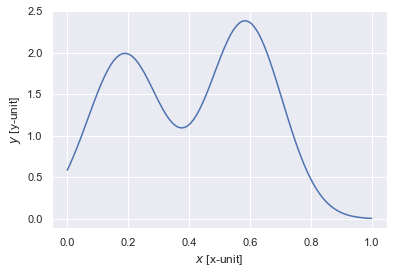

In [7]:
x=np.linspace(xmin,xmax,100)
plt.plot(x,G(x,A0,X0,W))
plt.xlabel('$x$ [x-unit]')
plt.ylabel('$y$ [y-unit]');

Assert: 
1. unknown constant background ($B\le 1$), unknown number of spectral lines with unknown amplitudes and positions.
2. known, natural width (W) of the spectral lines
3. known variance ($\sigma_\mathrm{exp}$) for the IID normal experimental errors
4. known and relevant interval:
   peak positions within [xmin=0, xmax=1] in position space, 
   peak amplitudes within [Amin=0, Amax=1], 

In [8]:
print(f'Natural width of spectral lines:                W = {W}')
print(f'Variance for IID normal exp errors:             s = {sigma_exp}')
print(f'Relevant range in position space:    [xmin, xmax] = [{xmin:.1f}, {xmax:.1f}]')
print(f'Relevant range for peak amplitudes:  [Amin, Amax] = [{Amin:.1f}, {Amax:.1f}]')

Natural width of spectral lines:                W = 0.12
Variance for IID normal exp errors:             s = 0.4
Relevant range in position space:    [xmin, xmax] = [0.0, 1.0]
Relevant range for peak amplitudes:  [Amin, Amax] = [0.0, 1.0]


In [9]:
# Generate experimental data
np.random.seed(42) # For reproducibility.  Set 42 to None for different values.
Ndata = 100 # Number of data points
xk = np.linspace(xmin, xmax, Ndata)
sk=np.ones_like(xk) * sigma_exp # We assume that the variance is the same for all k
ek = np.random.normal(loc=0.0, scale=sigma_exp, size=Ndata)
Dk = G(xk,A0,X0,W) + B + ek
# Data saved in a file (but also printed below)
data = [xk,Dk,sk]

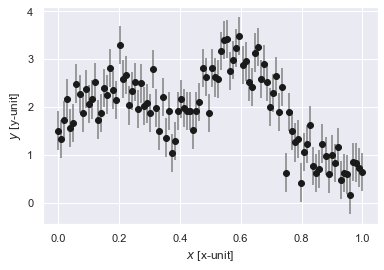

In [10]:
plt.errorbar(xk,Dk,yerr=sk,fmt='ok',ecolor='gray')
plt.xlabel('$x$ [x-unit]')
plt.ylabel('$y$ [y-unit]');

## Parameter estimation with your favorite MCMC sampler (emcee here!)

We will use an MCMC to draw samples from the posterior in order to solve the model fitting problem. We will use the emcee package, which requires us to first define functions which compute the prior, likelihood, and posterior under each model.  The model is determined by the number of peaks, which in turn defines the dimension of the model (an amplitude and a location to determine for each peak, plus the background amplitude).

### emcee

In [11]:
# Uniform priors for parameters

def log_prior(alpha):
    '''Logarithm of prior.
    
    Flat priors over predetermined ranges
    The size of alpha determines the model.
    Amplitudes are elements 0, 2, 4, ..., [0:-1:2]
    Positions are elements 1,3,5, ...     [1:-1:2]
    Background is the last element.    [-1]
    '''
    
    # All parameters must be positive
    if np.any(alpha < 0):
        return -np.inf  # log(0)
    # All amplitudes are assumed to be smaller than Amax
    elif np.any(alpha[0:-1:2] > Amax):
        return -np.inf
    # The positions are assumed to be in the [xmin, xmax] range
    elif np.any(alpha[1:-1:2] > xmax):
        return -np.inf
    # The background signal is assumed to be smaller than Bmax
    elif alpha[-1] > Bmax:
        return -np.inf
    else:
        return 0 # log(1), note that it is not properly normalized

In [12]:
def model_func(alpha, x=xk, width=W):
    '''Computes the model ideal spectrum Fk'''
    _amplitudes = alpha[0:-1:2]
    _positions = alpha[1:-1:2]
    _background = alpha[-1]
    return G(x,_amplitudes,_positions,width) + _background

def log_likelihood(alpha, data=data):
    '''Logarithm of likelihood function.
    
    Returns the negative sum of the squared residuals, which is
    equivalent to a chi-square measure or the logarithm of a
    gaussian likelihood function.
    '''
    x, y, sigma_y = data
    model_y = model_func(alpha,x=x)
    residuals = (model_y - y) / sigma_y
    return -0.5 * np.sum(residuals**2)

In [13]:
def log_posterior(alpha, data=data):
    '''Logarithm of posterior.'''
    _alpha = np.asarray(alpha)
    return log_prior(_alpha) + log_likelihood(_alpha, data=data)

First, we consider the model with $M=1$.

In [14]:
numpeaks=1 # Number of peaks in the *model*. *** You set this ***
           #  Note how numpeaks determines ndim below.
    
nwalkers=50 
nburn=1000
nsteps=5000

ndim = numpeaks*2 + 1  # this determines the model dimension

starting_guesses = (np.random.rand(nwalkers, ndim) * \
                    np.tile(np.ones(ndim), (nwalkers, 1)))
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
sampler.run_mcmc(starting_guesses, nsteps)
trace_unordered = sampler.chain[:, nburn:, :].reshape(-1, ndim)

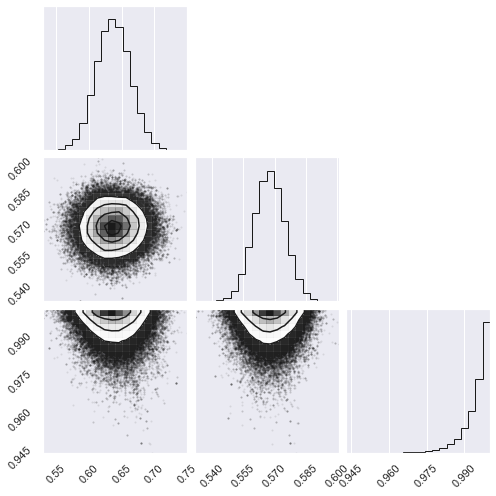

In [15]:
# First a corner plot without the ordered samples
figure = corner.corner(trace_unordered)

These corner plots give the pairwise joint and marginal posterior distributions, as simulated by MCMC.

In [16]:
trace = np.copy(trace_unordered)

for i, sample in enumerate(trace_unordered):
    # Sort by proposed peak position since (x0,x1,...) is the same as (x1,x0,...)
    x_sort = np.argsort(sample[1:-1:2])*2+1
    sample_sort = np.empty((2*x_sort.size + 1,), dtype=x_sort.dtype)
    sample_sort[-1]=len(sample_sort)-1
    sample_sort[1:-1:2] = x_sort
    sample_sort[0:-1:2] = x_sort-1
    trace[i] = sample[sample_sort]

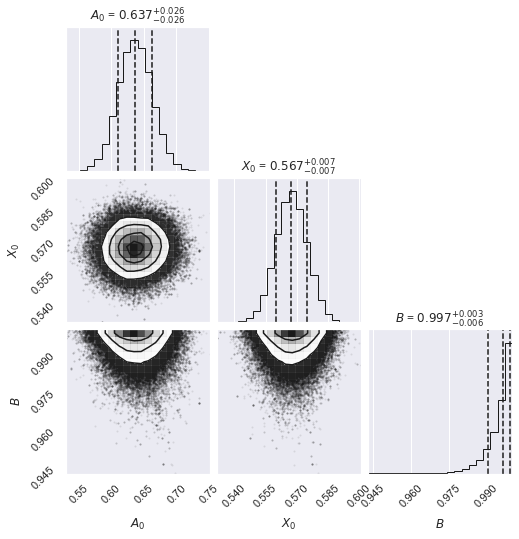

In [17]:
if numpeaks==2:
    truths_corner = truths
else:
    truths_corner = None

# Define a labels list with parameter names
labels_corner = []
for iM in range(numpeaks):
    labels_corner.append(f"$A_{iM}$")
    labels_corner.append(f"$X_{iM}$")
labels_corner.append(f"$B$")

figure = corner.corner(trace[:,:],labels=labels_corner,
                       quantiles=[0.16, 0.5, 0.84],truths=truths_corner,
                       show_titles=True, title_fmt='.3f', title_kwargs={"fontsize": 12})

These posterior plots look exactly the same as those in the previous corner plots, but with proper labeling as dictated by the code. Since there is only one peak in the current model, sorting each point in the MCMC chain by the proposed location, $x_j$, of the peak does not change anything.

In [18]:
params = np.percentile(trace_unordered, [16, 50, 84], axis=0)
with np.printoptions(precision=2):
    print(f"True values:", truths) 
    print(f"       MAP:", params[1,:]) 

True values: [0.6  0.19 0.71 0.59 0.72]
       MAP: [0.64 0.57 1.  ]


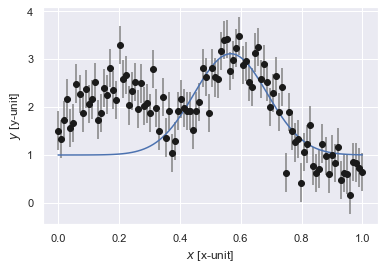

In [19]:
plt.errorbar(xk, Dk, yerr=sk, fmt='ok', ecolor='gray')
x = np.linspace(xmin,xmax,100)
plt.plot(x, G(x,params[1,0:-1:2], params[1,1:-1:2]) + params[1,-1])
plt.xlabel('$x$ [x-unit]')
plt.ylabel('$y$ [y-unit]');

The one-mode model seems to capture the stronger peak from the data, while the weaker peak is mostly ignored.

Now, consider the model with $M=2$.

In [20]:
numpeaks=2 # Number of peaks in the *model*. *** You set this ***
           #  Note how numpeaks determines ndim below.
    
nwalkers=50 
nburn=1000
nsteps=5000

ndim = numpeaks*2 + 1  # this determines the model dimension

starting_guesses = (np.random.rand(nwalkers, ndim) * \
                    np.tile(np.ones(ndim), (nwalkers, 1)))
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
sampler.run_mcmc(starting_guesses, nsteps)
trace_unordered = sampler.chain[:, nburn:, :].reshape(-1, ndim)

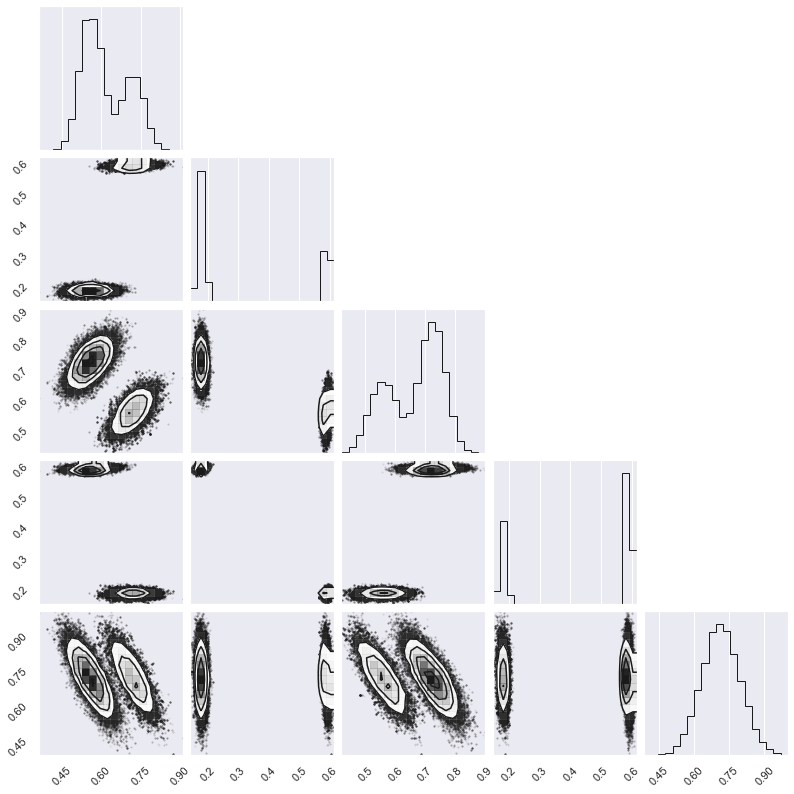

In [21]:
# First a corner plot without the ordered samples
figure = corner.corner(trace_unordered)

The posterior distributions for the locations and amplitudes of the "first peak" and "second peak" are all bimodal. This is because the notion of the "first peak" is arbitrary. As a result, each walker randomly chooses one peak to be labeled "first peak," and it is not necessarily the same peak as another walker's "first peak." Another evidence in support of this claim is the fact that the heights of the two modes switch when one goes from the marginal posterior distribution of $x_0$ to that of $x_1$, and similarly from $A_0$'s to $A_1$'s. Note that this is not a problem for the background, $B$, since it is a unique parameter separate from all the peaks.

In [22]:
trace = np.copy(trace_unordered)

for i, sample in enumerate(trace_unordered):
    # Sort by proposed peak position since (x0,x1,...) is the same as (x1,x0,...)
    x_sort = np.argsort(sample[1:-1:2])*2+1
    sample_sort = np.empty((2*x_sort.size + 1,), dtype=x_sort.dtype)
    sample_sort[-1]=len(sample_sort)-1
    sample_sort[1:-1:2] = x_sort
    sample_sort[0:-1:2] = x_sort-1
    trace[i] = sample[sample_sort]

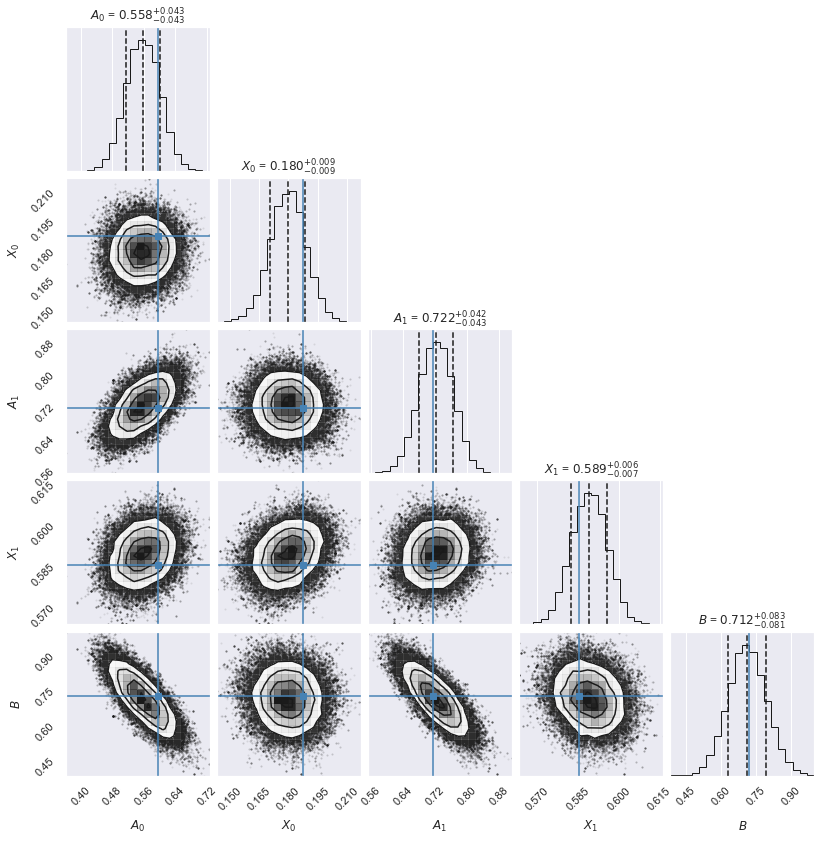

In [23]:
if numpeaks==2:
    truths_corner = truths
else:
    truths_corner = None

# Define a labels list with parameter names
labels_corner = []
for iM in range(numpeaks):
    labels_corner.append(f"$A_{iM}$")
    labels_corner.append(f"$X_{iM}$")
labels_corner.append(f"$B$")

figure = corner.corner(trace[:,:],labels=labels_corner,
                       quantiles=[0.16, 0.5, 0.84],truths=truths_corner,
                       show_titles=True, title_fmt='.3f', title_kwargs={"fontsize": 12})

Now, we sort the peak position so that $x_0 < x_1$ for all the walkers. This forces them to take the same convention of which peak to be called "the first peak," resulting in a single mode for each marginal posterior distribution. 

In [24]:
params = np.percentile(trace_unordered, [16, 50, 84], axis=0)
with np.printoptions(precision=2):
    print(f"True values:", truths) 
    print(f"       MAP:", params[1,:]) 

True values: [0.6  0.19 0.71 0.59 0.72]
       MAP: [0.59 0.19 0.69 0.58 0.71]


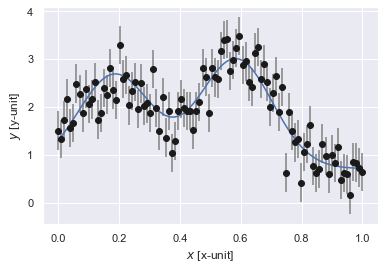

In [25]:
plt.errorbar(xk, Dk, yerr=sk, fmt='ok', ecolor='gray')
x = np.linspace(xmin,xmax,100)
plt.plot(x, G(x,params[1,0:-1:2], params[1,1:-1:2]) + params[1,-1])
plt.xlabel('$x$ [x-unit]')
plt.ylabel('$y$ [y-unit]');

The marginal posterior distributions from the latter corner plots yield a posterior bimodal spectrum prediction that matches the actual data quite well.

### Using parallel tempering: ptemcee

Model with $M=1$.

In [30]:
numpeaks = 1 # Number of peaks in the *model* (step through 1, 2, 3, 4)
             #  Note how this determines ndim below.

In [31]:
# Now we can construct a sampler object that will drive the PTMCMC; 
# in the first pass we chose to use 21 temperatures 
# (the default is for each temperature to increase by a factor of sqrt(2), 
# so the highest temperature will be T=1024, resulting in an effective 
# \sigma_T=32\sigma=3.2, which is about the separation of our modes). 

#ntemps = 21
#temps = np.array([np.sqrt(2)**i for i in range(ntemps)])

# This did not work well, so we modified the temperature ladder to improve 
#  the integration for evidence calculation:
#  need more low temperatures, i.e. finer grid near beta = 1.
ntemps_lo = 8
ntemps_hi = 21
temps_lo = np.array([2**(i/8.) for i in range(ntemps_lo)])
temps_hi = np.array([np.sqrt(2)**i for i in range(ntemps_hi)])
temps = np.concatenate((temps_lo,temps_hi[temps_hi>max(temps_lo)]))
ntemps=len(temps)

betas=1/temps

# Let us use 10 walkers in the ensemble at each temperature:
ndim = numpeaks*2 + 1  # this determines the model dimension
nwalkers = max(10,ndim*2+2)

nburnin=1000
nsteps=5000
nthin = 10 # only record every nthin iteration

nthreads = 1

In [32]:
p0 = np.random.uniform(size=(ntemps, nwalkers, ndim))

In [33]:
sampler = ptemcee.Sampler(nwalkers, ndim, log_likelihood, log_prior, ntemps,
                         threads=nthreads, betas=betas)

In [34]:
#sampler=PTSampler(ntemps, nwalkers, ndim, log_likelihood, log_prior, 
#                  threads=nthreads, betas=betas)

#Making the sampling multi-threaded is as simple as adding the threads=Nthreads 
# argument to PTSampler. We could have modified the temperature ladder using the 
# betas optional argument (which should be an array of \beta=1/T values). 

#First, we run the sampler for 1000 burn-in iterations:
print("Running burn-in phase")
for p, lnprob, lnlike in sampler.sample(p0, iterations=nburnin):
    pass
sampler.reset()

print("Running MCMC chains")
#Now we sample for nwalkers*niterations, recording every nthin-th sample:

for p, lnprob, lnlike in sampler.sample(p, iterations=nsteps, thin=nthin):
    pass 

Running burn-in phase
Running MCMC chains


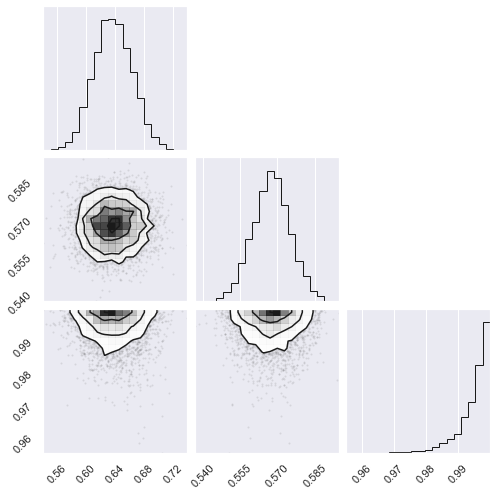

In [35]:
pt_sampler_T0 = sampler.chain[0,...].reshape(-1,ndim)
figure = corner.corner(pt_sampler_T0)

# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

#### Perform thermodynamic integration from PT sampler

In [36]:
# From PT sampler
(lnZ, dlnZ) = sampler.log_evidence_estimate()
print(f"The log evidence is {lnZ:.3f} +/- {dlnZ:.3f}")
print("NOTE: This thermodynamic integration output from ptemcee",\
      "may not be very reliable due to poor numerical integration.")
print("Better do it yourself to check (see below).")


The log evidence is -197.340 +/- 0.453
NOTE: This thermodynamic integration output from ptemcee may not be very reliable due to poor numerical integration.
Better do it yourself to check (see below).


In [37]:
# Array with beta values (1/T)
betas = sampler.betas
avg_lnl = np.zeros_like(betas) # averages of log likelihood for different beta
var_lnl = np.zeros_like(betas) # variances of log likelihood for different beta
for ib,b in enumerate(betas):
    avg_lnl[ib] = np.mean(sampler.loglikelihood[ib,...].reshape(-1))
    var_lnl[ib] = np.var(sampler.loglikelihood[ib,...].reshape(-1))
    
betas0 = np.concatenate((sampler.betas, np.array([0])))
dbetas = np.diff(betas0)

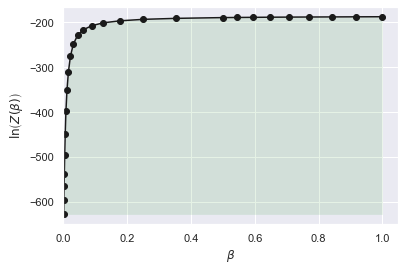

In [38]:
plt.plot(betas,avg_lnl,'ko-')
ax=plt.gca()
ymin=np.ones_like(betas)*min(avg_lnl)
ax.fill_between(betas, ymin,avg_lnl,facecolor='green', alpha=0.1)
fig=plt.gcf()
#ax.set_ylim([-100,-30]);
ax.set_xlim([0.,1.05]);
ax.set_xlabel(r'$\beta$');
ax.set_ylabel(r'$\ln\left(Z(\beta)\right)$');

In [39]:
print("Integrate using trapezoid approximation with N={} points".format(ntemps))
print(f"from {betas0[0]:.4e} to {betas0[-1]:.4e}")
lnzl = -np.trapz(avg_lnl, x=betas)
print(f"\nWe find log-evidence = {lnzl:7.4f}")


Integrate using trapezoid approximation with N=27 points
from 1.0000e+00 to 0.0000e+00

We find log-evidence = -196.7067


Model with $M=2$.

In [40]:
numpeaks = 2 # Number of peaks in the *model* (step through 1, 2, 3, 4)
             #  Note how this determines ndim below.

In [41]:
# Now we can construct a sampler object that will drive the PTMCMC; 
# in the first pass we chose to use 21 temperatures 
# (the default is for each temperature to increase by a factor of sqrt(2), 
# so the highest temperature will be T=1024, resulting in an effective 
# \sigma_T=32\sigma=3.2, which is about the separation of our modes). 

#ntemps = 21
#temps = np.array([np.sqrt(2)**i for i in range(ntemps)])

# This did not work well, so we modified the temperature ladder to improve 
#  the integration for evidence calculation:
#  need more low temperatures, i.e. finer grid near beta = 1.
ntemps_lo = 8
ntemps_hi = 21
temps_lo = np.array([2**(i/8.) for i in range(ntemps_lo)])
temps_hi = np.array([np.sqrt(2)**i for i in range(ntemps_hi)])
temps = np.concatenate((temps_lo,temps_hi[temps_hi>max(temps_lo)]))
ntemps=len(temps)

betas=1/temps

# Let us use 10 walkers in the ensemble at each temperature:
ndim = numpeaks*2 + 1  # this determines the model dimension
nwalkers = max(10,ndim*2+2)

nburnin=1000
nsteps=5000
nthin = 10 # only record every nthin iteration

nthreads = 1

In [42]:
p0 = np.random.uniform(size=(ntemps, nwalkers, ndim))

In [43]:
sampler = ptemcee.Sampler(nwalkers, ndim, log_likelihood, log_prior, ntemps,
                         threads=nthreads, betas=betas)

In [44]:
#sampler=PTSampler(ntemps, nwalkers, ndim, log_likelihood, log_prior, 
#                  threads=nthreads, betas=betas)

#Making the sampling multi-threaded is as simple as adding the threads=Nthreads 
# argument to PTSampler. We could have modified the temperature ladder using the 
# betas optional argument (which should be an array of \beta=1/T values). 

#First, we run the sampler for 1000 burn-in iterations:
print("Running burn-in phase")
for p, lnprob, lnlike in sampler.sample(p0, iterations=nburnin):
    pass
sampler.reset()

print("Running MCMC chains")
#Now we sample for nwalkers*niterations, recording every nthin-th sample:

for p, lnprob, lnlike in sampler.sample(p, iterations=nsteps, thin=nthin):
    pass 

Running burn-in phase
Running MCMC chains


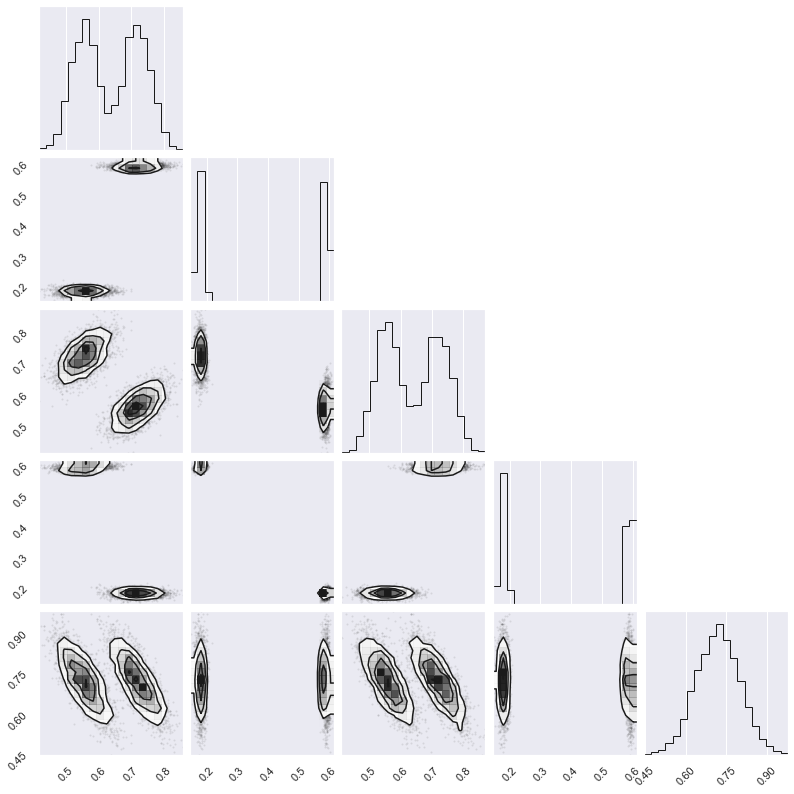

In [45]:
pt_sampler_T0 = sampler.chain[0,...].reshape(-1,ndim)
figure = corner.corner(pt_sampler_T0)

# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

Note that these corner plots are invalid because the peak labels are not yet ordered. However, they have nothing to do with the estimation of evidence performed below.

#### Perform thermodynamic integration from PT sampler

In [46]:
# From PT sampler
(lnZ, dlnZ) = sampler.log_evidence_estimate()
print(f"The log evidence is {lnZ:.3f} +/- {dlnZ:.3f}")
print("NOTE: This thermodynamic integration output from ptemcee",\
      "may not be very reliable due to poor numerical integration.")
print("Better do it yourself to check (see below).")


The log evidence is -53.500 +/- 0.520
NOTE: This thermodynamic integration output from ptemcee may not be very reliable due to poor numerical integration.
Better do it yourself to check (see below).


In [47]:
# Array with beta values (1/T)
betas = sampler.betas
avg_lnl = np.zeros_like(betas) # averages of log likelihood for different beta
var_lnl = np.zeros_like(betas) # variances of log likelihood for different beta
for ib,b in enumerate(betas):
    avg_lnl[ib] = np.mean(sampler.loglikelihood[ib,...].reshape(-1))
    var_lnl[ib] = np.var(sampler.loglikelihood[ib,...].reshape(-1))
    
betas0 = np.concatenate((sampler.betas, np.array([0])))
dbetas = np.diff(betas0)

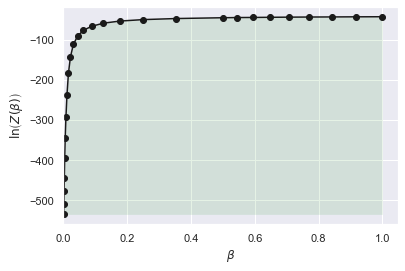

In [48]:
plt.plot(betas,avg_lnl,'ko-')
ax=plt.gca()
ymin=np.ones_like(betas)*min(avg_lnl)
ax.fill_between(betas, ymin,avg_lnl,facecolor='green', alpha=0.1)
fig=plt.gcf()
#ax.set_ylim([-100,-30]);
ax.set_xlim([0.,1.05]);
ax.set_xlabel(r'$\beta$');
ax.set_ylabel(r'$\ln\left(Z(\beta)\right)$');

In [49]:
print("Integrate using trapezoid approximation with N={} points".format(ntemps))
print(f"from {betas0[0]:.4e} to {betas0[-1]:.4e}")
lnzl = -np.trapz(avg_lnl, x=betas)
print(f"\nWe find log-evidence = {lnzl:7.4f}")


Integrate using trapezoid approximation with N=27 points
from 1.0000e+00 to 0.0000e+00

We find log-evidence = -52.9773


Model with $M=3$.

In [55]:
numpeaks = 3 # Number of peaks in the *model* (step through 1, 2, 3, 4)
             #  Note how this determines ndim below.

In [56]:
# Now we can construct a sampler object that will drive the PTMCMC; 
# in the first pass we chose to use 21 temperatures 
# (the default is for each temperature to increase by a factor of sqrt(2), 
# so the highest temperature will be T=1024, resulting in an effective 
# \sigma_T=32\sigma=3.2, which is about the separation of our modes). 

#ntemps = 21
#temps = np.array([np.sqrt(2)**i for i in range(ntemps)])

# This did not work well, so we modified the temperature ladder to improve 
#  the integration for evidence calculation:
#  need more low temperatures, i.e. finer grid near beta = 1.
ntemps_lo = 8
ntemps_hi = 21
temps_lo = np.array([2**(i/8.) for i in range(ntemps_lo)])
temps_hi = np.array([np.sqrt(2)**i for i in range(ntemps_hi)])
temps = np.concatenate((temps_lo,temps_hi[temps_hi>max(temps_lo)]))
ntemps=len(temps)

betas=1/temps

# Let us use 10 walkers in the ensemble at each temperature:
ndim = numpeaks*2 + 1  # this determines the model dimension
nwalkers = max(10,ndim*2+2)

nburnin=1000
nsteps=5000
nthin = 10 # only record every nthin iteration

nthreads = 1

In [57]:
p0 = np.random.uniform(size=(ntemps, nwalkers, ndim))

In [58]:
sampler = ptemcee.Sampler(nwalkers, ndim, log_likelihood, log_prior, ntemps,
                         threads=nthreads, betas=betas)

In [59]:
#sampler=PTSampler(ntemps, nwalkers, ndim, log_likelihood, log_prior, 
#                  threads=nthreads, betas=betas)

#Making the sampling multi-threaded is as simple as adding the threads=Nthreads 
# argument to PTSampler. We could have modified the temperature ladder using the 
# betas optional argument (which should be an array of \beta=1/T values). 

#First, we run the sampler for 1000 burn-in iterations:
print("Running burn-in phase")
for p, lnprob, lnlike in sampler.sample(p0, iterations=nburnin):
    pass
sampler.reset()

print("Running MCMC chains")
#Now we sample for nwalkers*niterations, recording every nthin-th sample:

for p, lnprob, lnlike in sampler.sample(p, iterations=nsteps, thin=nthin):
    pass 

Running burn-in phase
Running MCMC chains


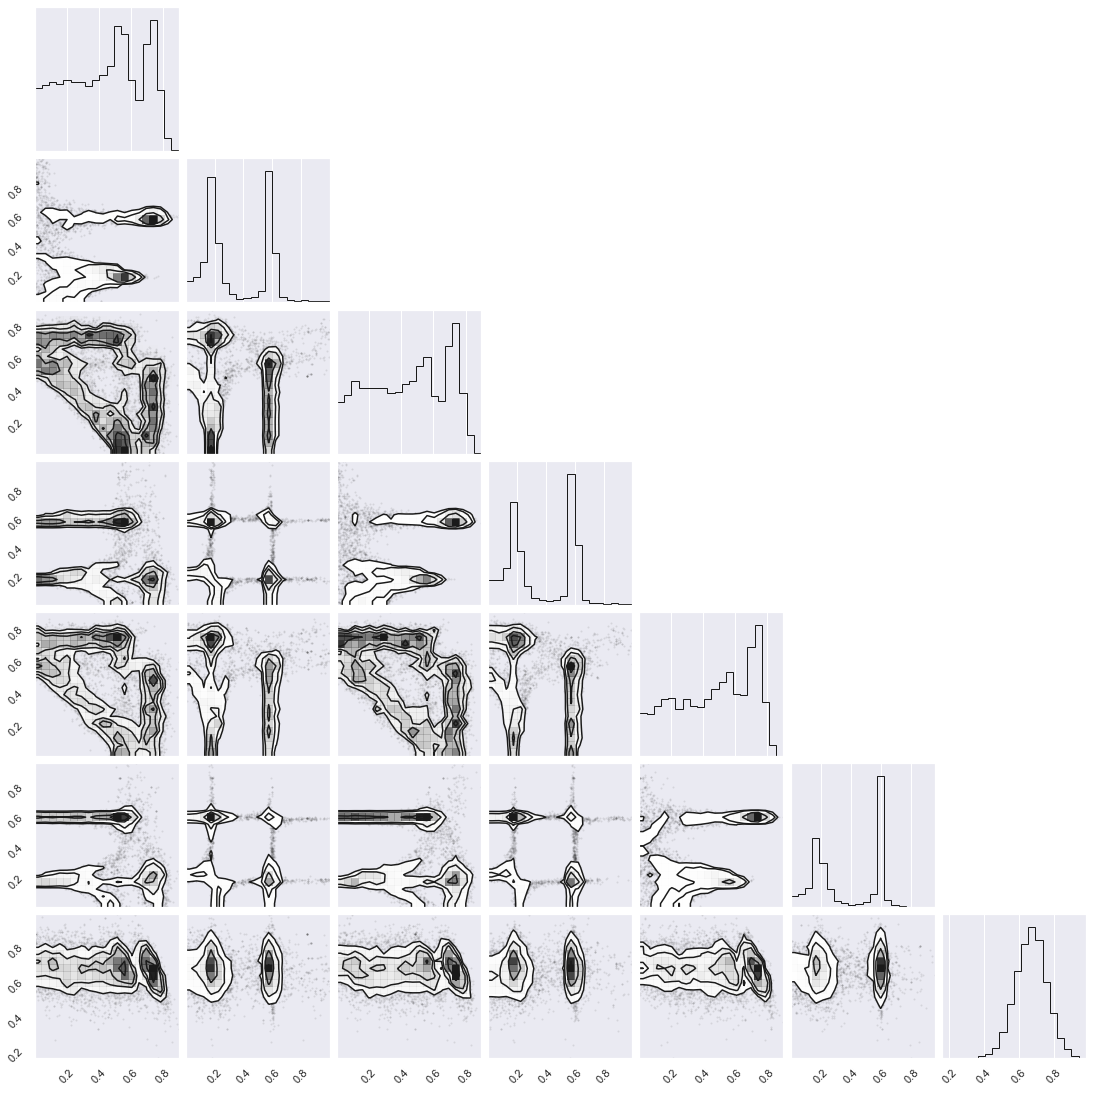

In [60]:
pt_sampler_T0 = sampler.chain[0,...].reshape(-1,ndim)
figure = corner.corner(pt_sampler_T0)

# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

Note that these corner plots are invalid because the peak labels are not yet ordered. However, they have nothing to do with the estimation of evidence performed below.

#### Perform thermodynamic integration from PT sampler

In [61]:
# From PT sampler
(lnZ, dlnZ) = sampler.log_evidence_estimate()
print(f"The log evidence is {lnZ:.3f} +/- {dlnZ:.3f}")
print("NOTE: This thermodynamic integration output from ptemcee",\
      "may not be very reliable due to poor numerical integration.")
print("Better do it yourself to check (see below).")


The log evidence is -53.554 +/- 0.558
NOTE: This thermodynamic integration output from ptemcee may not be very reliable due to poor numerical integration.
Better do it yourself to check (see below).


In [62]:
# Array with beta values (1/T)
betas = sampler.betas
avg_lnl = np.zeros_like(betas) # averages of log likelihood for different beta
var_lnl = np.zeros_like(betas) # variances of log likelihood for different beta
for ib,b in enumerate(betas):
    avg_lnl[ib] = np.mean(sampler.loglikelihood[ib,...].reshape(-1))
    var_lnl[ib] = np.var(sampler.loglikelihood[ib,...].reshape(-1))
    
betas0 = np.concatenate((sampler.betas, np.array([0])))
dbetas = np.diff(betas0)

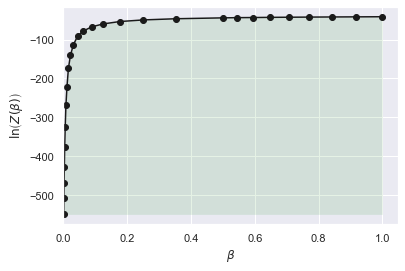

In [63]:
plt.plot(betas,avg_lnl,'ko-')
ax=plt.gca()
ymin=np.ones_like(betas)*min(avg_lnl)
ax.fill_between(betas, ymin,avg_lnl,facecolor='green', alpha=0.1)
fig=plt.gcf()
#ax.set_ylim([-100,-30]);
ax.set_xlim([0.,1.05]);
ax.set_xlabel(r'$\beta$');
ax.set_ylabel(r'$\ln\left(Z(\beta)\right)$');

In [64]:
print("Integrate using trapezoid approximation with N={} points".format(ntemps))
print(f"from {betas0[0]:.4e} to {betas0[-1]:.4e}")
lnzl = -np.trapz(avg_lnl, x=betas)
print(f"\nWe find log-evidence = {lnzl:7.4f}")


Integrate using trapezoid approximation with N=27 points
from 1.0000e+00 to 0.0000e+00

We find log-evidence = -53.0404


Model with $M=4$.

In [65]:
numpeaks = 4 # Number of peaks in the *model* (step through 1, 2, 3, 4)
             #  Note how this determines ndim below.

In [66]:
# Now we can construct a sampler object that will drive the PTMCMC; 
# in the first pass we chose to use 21 temperatures 
# (the default is for each temperature to increase by a factor of sqrt(2), 
# so the highest temperature will be T=1024, resulting in an effective 
# \sigma_T=32\sigma=3.2, which is about the separation of our modes). 

#ntemps = 21
#temps = np.array([np.sqrt(2)**i for i in range(ntemps)])

# This did not work well, so we modified the temperature ladder to improve 
#  the integration for evidence calculation:
#  need more low temperatures, i.e. finer grid near beta = 1.
ntemps_lo = 8
ntemps_hi = 21
temps_lo = np.array([2**(i/8.) for i in range(ntemps_lo)])
temps_hi = np.array([np.sqrt(2)**i for i in range(ntemps_hi)])
temps = np.concatenate((temps_lo,temps_hi[temps_hi>max(temps_lo)]))
ntemps=len(temps)

betas=1/temps

# Let us use 10 walkers in the ensemble at each temperature:
ndim = numpeaks*2 + 1  # this determines the model dimension
nwalkers = max(10,ndim*2+2)

nburnin=1000
nsteps=5000
nthin = 10 # only record every nthin iteration

nthreads = 1

In [67]:
p0 = np.random.uniform(size=(ntemps, nwalkers, ndim))

In [68]:
sampler = ptemcee.Sampler(nwalkers, ndim, log_likelihood, log_prior, ntemps,
                         threads=nthreads, betas=betas)

In [69]:
#sampler=PTSampler(ntemps, nwalkers, ndim, log_likelihood, log_prior, 
#                  threads=nthreads, betas=betas)

#Making the sampling multi-threaded is as simple as adding the threads=Nthreads 
# argument to PTSampler. We could have modified the temperature ladder using the 
# betas optional argument (which should be an array of \beta=1/T values). 

#First, we run the sampler for 1000 burn-in iterations:
print("Running burn-in phase")
for p, lnprob, lnlike in sampler.sample(p0, iterations=nburnin):
    pass
sampler.reset()

print("Running MCMC chains")
#Now we sample for nwalkers*niterations, recording every nthin-th sample:

for p, lnprob, lnlike in sampler.sample(p, iterations=nsteps, thin=nthin):
    pass 

Running burn-in phase
Running MCMC chains


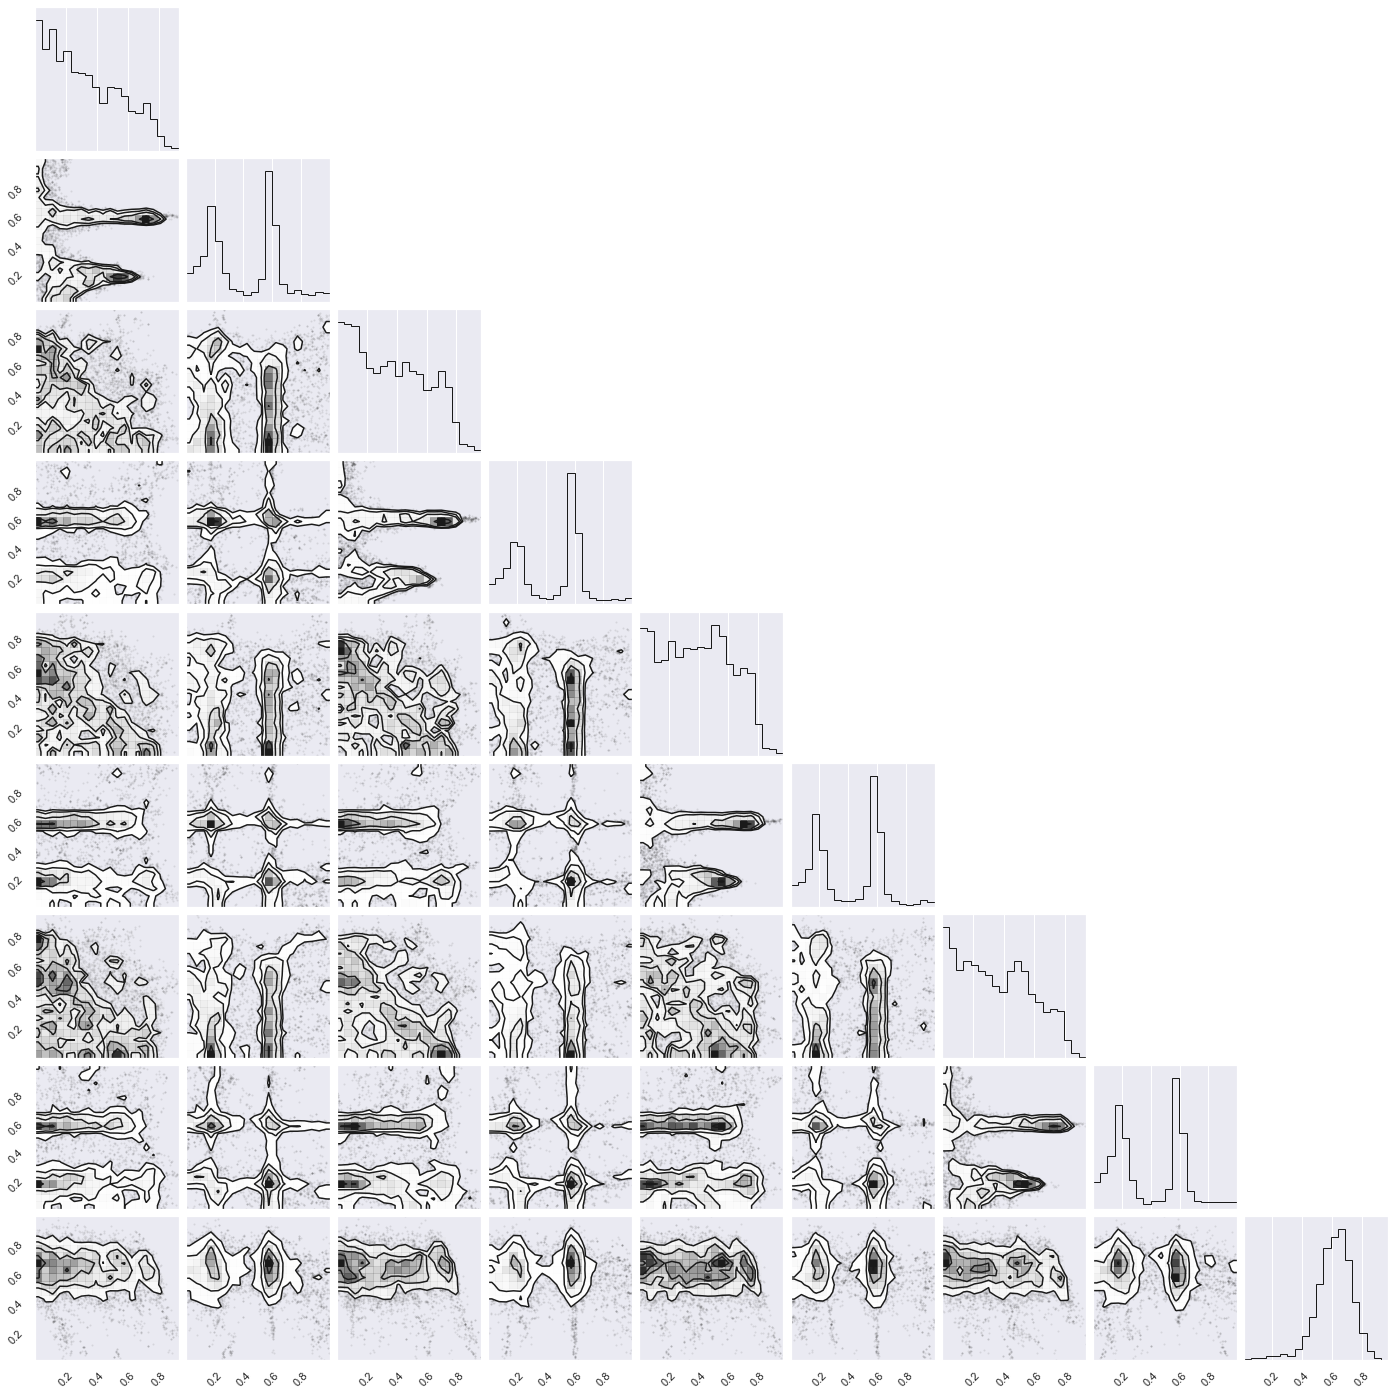

In [70]:
pt_sampler_T0 = sampler.chain[0,...].reshape(-1,ndim)
figure = corner.corner(pt_sampler_T0)

# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

Note that these corner plots are invalid because the peak labels are not yet ordered. However, they have nothing to do with the estimation of evidence performed below.

#### Perform thermodynamic integration from PT sampler

In [71]:
# From PT sampler
(lnZ, dlnZ) = sampler.log_evidence_estimate()
print(f"The log evidence is {lnZ:.3f} +/- {dlnZ:.3f}")
print("NOTE: This thermodynamic integration output from ptemcee",\
      "may not be very reliable due to poor numerical integration.")
print("Better do it yourself to check (see below).")


The log evidence is -54.213 +/- 0.554
NOTE: This thermodynamic integration output from ptemcee may not be very reliable due to poor numerical integration.
Better do it yourself to check (see below).


In [72]:
# Array with beta values (1/T)
betas = sampler.betas
avg_lnl = np.zeros_like(betas) # averages of log likelihood for different beta
var_lnl = np.zeros_like(betas) # variances of log likelihood for different beta
for ib,b in enumerate(betas):
    avg_lnl[ib] = np.mean(sampler.loglikelihood[ib,...].reshape(-1))
    var_lnl[ib] = np.var(sampler.loglikelihood[ib,...].reshape(-1))
    
betas0 = np.concatenate((sampler.betas, np.array([0])))
dbetas = np.diff(betas0)

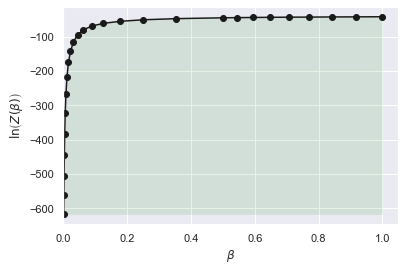

In [73]:
plt.plot(betas,avg_lnl,'ko-')
ax=plt.gca()
ymin=np.ones_like(betas)*min(avg_lnl)
ax.fill_between(betas, ymin,avg_lnl,facecolor='green', alpha=0.1)
fig=plt.gcf()
#ax.set_ylim([-100,-30]);
ax.set_xlim([0.,1.05]);
ax.set_xlabel(r'$\beta$');
ax.set_ylabel(r'$\ln\left(Z(\beta)\right)$');

In [74]:
print("Integrate using trapezoid approximation with N={} points".format(ntemps))
print(f"from {betas0[0]:.4e} to {betas0[-1]:.4e}")
lnzl = -np.trapz(avg_lnl, x=betas)
print(f"\nWe find log-evidence = {lnzl:7.4f}")


Integrate using trapezoid approximation with N=27 points
from 1.0000e+00 to 0.0000e+00

We find log-evidence = -53.7186
